In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
x_train = train_datagen.flow_from_directory(r"C:/Users/ADMIN/Download/Flowers-Dataset/training",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 4317 images belonging to 5 classes.


In [7]:
x_test = test_datagen.flow_from_directory(r"C:/Users/ADMIN/Download/Flowers-Dataset/testing",target_size=(64,64),batch_size=32,class_mode = "categorical")

Found 4317 images belonging to 5 classes.


In [8]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [9]:
model = Sequential()

In [10]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))

In [14]:
model.add(Dense(units=200,kernel_initializer="random_uniform",activation="relu"))

In [15]:
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))

In [16]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [18]:
model.fit_generator(x_train,steps_per_epoch=39,epochs=25,validation_data=x_test,validation_steps=10)

Epoch 1/25


C:\Users\hemaa\AppData\Local\Temp\ipykernel_8416\3505885595.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=39,epochs=25,validation_data=x_test,validation_steps=10)


39/39 [==============================] - 5s 137ms/step - loss: 0.9161 - accuracy: 0.6434 - val_loss: 0.8567 - val_accuracy: 0.6500
Epoch 2/25
39/39 [==============================] - 8s 215ms/step - loss: 0.8285 - accuracy: 0.6683 - val_loss: 0.9969 - val_accuracy: 0.6125
Epoch 3/25
39/39 [==============================] - 8s 208ms/step - loss: 0.8354 - accuracy: 0.6755 - val_loss: 0.8455 - val_accuracy: 0.6938
Epoch 4/25
39/39 [==============================] - 8s 208ms/step - loss: 0.8230 - accuracy: 0.6787 - val_loss: 0.8277 - val_accuracy: 0.6781
Epoch 5/25
39/39 [==============================] - 8s 194ms/step - loss: 0.8788 - accuracy: 0.6619 - val_loss: 0.8437 - val_accuracy: 0.6406
Epoch 6/25
39/39 [==============================] - 8s 206ms/step - loss: 0.8427 - accuracy: 0.6731 - val_loss: 0.7094 - val_accuracy: 0.7469
Epoch 7/25
39/39 [==============================] - 8s 214ms/step - loss: 0.8250 - accuracy: 0.6851 - val_loss: 0.8392 - val_accuracy: 0.6687
Epoch 8/25
39/39 

In [19]:
model.save("Flowers.h5")

In [20]:
from tensorflow.keras.models import load_model

In [21]:
from tensorflow.keras.preprocessing import image

In [22]:
import numpy as np

In [23]:
model = load_model("Flowers.h5")

In [26]:
img = image.load_img(r"C:/Flower-Dataset/testing/tulip/tulip.jpg",target_size=(64,64))

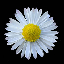

In [27]:
img

In [28]:
type(img)

PIL.Image.Image

In [29]:
x = image.img_to_array(img)

In [30]:
x

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [31]:
x.shape

(64, 64, 3)

In [32]:
x = np.expand_dims(x,axis=0)

In [33]:
x.shape

(1, 64, 64, 3)

In [34]:
pred_prob = model.predict(x)

1/1 [==============================] - 3s 3s/step


In [35]:
pred_prob

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [36]:
class_name=["Daisy","Dandelion","Rose","Sunflower","Tulip"]
pred_id = pred_prob.argmax(axis = 1)[0]

In [37]:
pred_id

0

In [38]:
print("Predicted Flower is ",str(class_name[pred_id]))

Predicted Flower is  Daisy
